In [97]:
from sqlalchemy import create_engine
import pandas as pd
import seaborn as sb
import matplotlib
import numpy as np

In [38]:
driver = 'mysql+pymysql:'
user = 'root'
password = '17028854'
ip = '35.195.111.11'
database = 'Avocalypse'

connection_string = f'{driver}//{user}:{password}@{ip}/{database}'
engine = create_engine(connection_string)

# Google searches of "Avocado": On-line popularity

In [8]:
gtrend = pd.read_sql('gtrend',con=engine)

In [20]:
gtrend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 4 columns):
index         183 non-null int64
year          183 non-null object
month         183 non-null object
popularity    183 non-null object
dtypes: int64(1), object(3)
memory usage: 5.8+ KB


In [24]:
gtrend['year'] = gtrend['year'].astype('int64')
gtrend['month'] = gtrend['month'].astype('int64')
gtrend['popularity'] = gtrend['popularity'].astype('int64')

In [251]:
sb.set(rc={'figure.figsize':(15,8)})

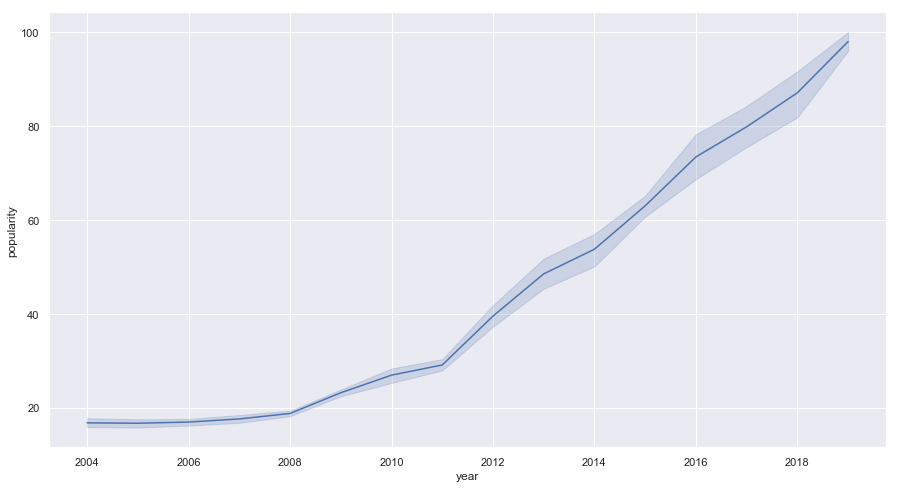

In [252]:
sb.lineplot(data=gtrend, x=gtrend.year, y=gtrend.popularity)

# Production

In [208]:
countries = pd.read_sql('countries',con=engine)
prices = pd.read_sql('prices',con=engine)
production = pd.read_sql('production',con=engine)

In [209]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
index        52 non-null int64
Area         52 non-null object
Area Code    52 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.3+ KB


In [210]:
countries = countries.drop(columns='index')

In [211]:
production.head()

,index,Area Code,Year Code,Total_protuction_t,Area harvested
0,0,9,2007,3600.0,570.0
1,1,9,2008,3500.0,540.0
2,2,9,2009,3600.0,548.0
3,3,9,2010,3726.0,560.0
4,4,9,2011,3840.0,570.0


In [212]:
production = production.drop(columns='index')

In [213]:
production.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 4 columns):
Area Code             759 non-null int64
Year Code             759 non-null int64
Total_protuction_t    745 non-null float64
Area harvested        745 non-null float64
dtypes: float64(2), int64(2)
memory usage: 23.8 KB


In [214]:
production_countries = production.merge(countries, how='left', on='Area Code')

In [215]:
production_countries.head()

,Area Code,Year Code,Total_protuction_t,Area harvested,Area
0,9,2007,3600.0,570.0,Argentina
1,9,2008,3500.0,540.0,Argentina
2,9,2009,3600.0,548.0,Argentina
3,9,2010,3726.0,560.0,Argentina
4,9,2011,3840.0,570.0,Argentina


In [216]:
total_yearly_production = production_countries.groupby('Year Code').sum()['Total_protuction_t']

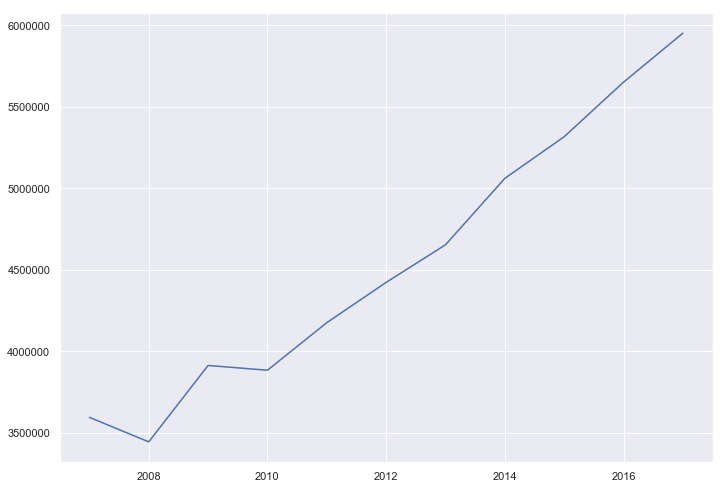

In [218]:
sb.lineplot(data=total_yearly_production)

In [267]:
(total_yearly_production.max()-total_yearly_production.min())/total_yearly_production.min()

0.7272834927115209

In [219]:
production_countries['production_share'] = production_countries['Total_protuction_t'].div(production_countries.groupby('Year Code')['Total_protuction_t'].transform('sum'))

In [230]:
top_10_countries_yearly = production_countries.groupby(['Area','Year Code']).sum().sort_values('Total_protuction_t',ascending=False).head(110)[['Total_protuction_t','Area harvested','production_share']].reset_index()

top10_2017 = top_10_countries_yearly[top_10_countries_yearly['Year Code'] == 2017]



In [239]:
top10_2017['cumulative_share'] = top10_2017['production_share'].cumsum()

/usr/local/Cellar/ipython/7.2.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [246]:
top10_2017

,Area,Year Code,Total_protuction_t,Area harvested,production_share,cumulative_share
0,Mexico,2017,2029886.0,188723.0,0.341093,0.341093
11,Dominican Republic,2017,637688.0,14571.0,0.107154,0.448247
15,Peru,2017,466758.0,39489.0,0.078432,0.526679
20,Indonesia,2017,363157.0,28524.0,0.061023,0.587702
22,Colombia,2017,314275.0,39172.0,0.052809,0.640511
47,Brazil,2017,213041.0,12940.0,0.035798,0.676309
55,Kenya,2017,194279.0,11605.0,0.032646,0.708955
91,Venezuela (Bolivarian Republic of),2017,133922.0,11800.0,0.022504,0.731459
92,Chile,2017,133636.0,30078.0,0.022456,0.753914
93,United States of America,2017,132730.0,22900.0,0.022303,0.776218


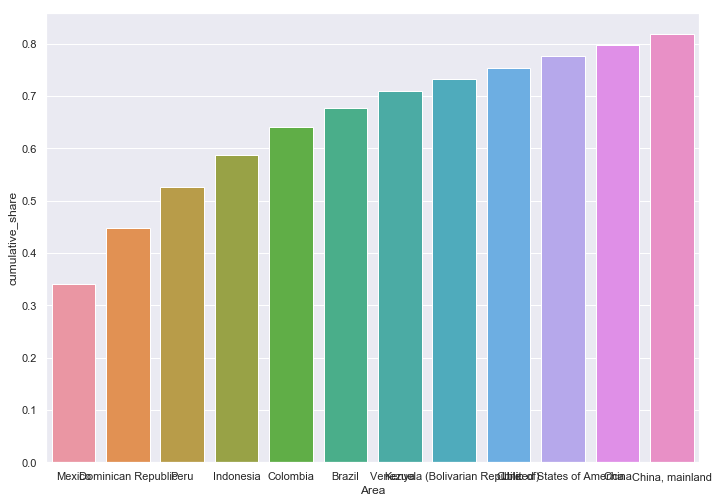

In [247]:
sb.barplot(data=top10_2017,x='Area',y='cumulative_share')

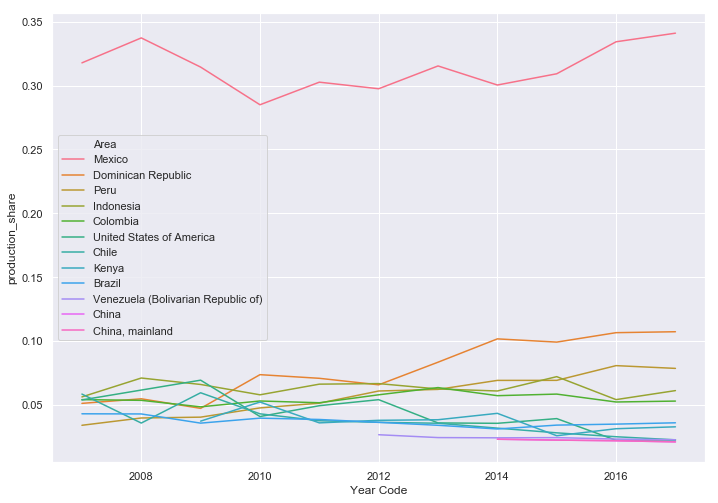

In [228]:
sb.lineplot(data=top_10_countries_yearly,hue='Area',x='Year Code',y='production_share')

# Price

In [52]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 3 columns):
Area Code    527 non-null int64
Year Code    527 non-null int64
Value        527 non-null float64
dtypes: float64(1), int64(2)
memory usage: 12.4 KB


In [51]:
prices = prices.drop(columns='index')

In [61]:
prices_country = prices.merge(countries, how='left', on='Area Code')

In [62]:
prices_country.head(2)

,Area Code,Year Code,Value,Area
0,9,2007,123.086061,Argentina
1,9,2008,155.952012,Argentina


In [260]:
list(top10_2017['Area'])

['Mexico',
 'Dominican Republic',
 'Peru',
 'Indonesia',
 'Colombia',
 'Brazil',
 'Kenya',
 'Venezuela (Bolivarian Republic of)',
 'Chile',
 'United States of America',
 'China',
 'China, mainland']

In [261]:
top10_prices = prices_country[prices_country['Area'].isin(list(top10_2017['Area']))]

In [262]:
top10_prices = top10_prices.reset_index(drop=True)

In [279]:
top10_prices_2017 = top10_prices[top10_prices['Year Code']==2017]

In [280]:
top10_prices_2017

,Area Code,Year Code,Value,Area
20,40,2017,438.672940,Chile
71,101,2017,194.070178,Indonesia
92,138,2017,270.871299,Mexico
103,170,2017,345.833333,Peru


In [281]:
top10_prices_2016 = top10_prices[top10_prices['Year Code']==2016]

In [282]:
top10_prices_2016

,Area Code,Year Code,Value,Area
9,21,2016,134.504212,Brazil
19,40,2016,458.211038,Chile
30,351,2016,192.127651,China
40,41,2016,192.127651,"China, mainland"
50,44,2016,106.566146,Colombia
60,56,2016,164.077085,Dominican Republic
70,101,2016,210.569248,Indonesia
81,114,2016,202.511226,Kenya
91,138,2016,221.828177,Mexico
102,170,2016,272.708333,Peru


In [283]:
top10_2016 = top_10_countries_yearly[top_10_countries_yearly['Year Code'] == 2016]


In [289]:
top10_2016_price_prod = top10_2016.merge(top10_prices_2016,on='Area').drop(columns='Year Code_x')

In [292]:
top10_2016_price_prod['Price_ton']=top10_2016_price_prod['Value']*top10_2016_price_prod['Total_protuction_t']/top10_2016_price_prod['Total_protuction_t'].sum()

In [293]:
top10_2016_price_prod

,Area,Total_protuction_t,Area harvested,production_share,Area Code,Year Code_y,Value,Price_ton
0,Mexico,1889354.0,180536.0,0.334356,138,2016,221.828177,91.923640
1,Dominican Republic,601349.0,13375.0,0.106420,56,2016,164.077085,21.640719
2,Peru,455394.0,37871.0,0.080590,170,2016,272.708333,27.238480
3,Indonesia,304938.0,23807.0,0.053964,101,2016,210.569248,14.083275
4,Colombia,294389.0,40057.0,0.052097,44,2016,106.566146,6.880785
5,Brazil,196422.0,10907.0,0.034760,21,2016,134.504212,5.794596
6,Kenya,176045.0,10305.0,0.031154,114,2016,202.511226,7.819338
7,Chile,140558.0,29933.0,0.024874,40,2016,458.211038,14.125970
8,Venezuela (Bolivarian Republic of),130290.0,11880.0,0.023057,236,2016,39069.150716,1116.457557
9,United States of America,124860.0,23200.0,0.022096,231,2016,121.291866,3.321637


In [275]:
top10_2017.merge(top10_prices.group,on=)

,Area,Year Code,Total_protuction_t,Area harvested,production_share,cumulative_share
0,Mexico,2017,2029886.0,188723.0,0.341093,0.341093
11,Dominican Republic,2017,637688.0,14571.0,0.107154,0.448247
15,Peru,2017,466758.0,39489.0,0.078432,0.526679
20,Indonesia,2017,363157.0,28524.0,0.061023,0.587702
22,Colombia,2017,314275.0,39172.0,0.052809,0.640511
47,Brazil,2017,213041.0,12940.0,0.035798,0.676309
55,Kenya,2017,194279.0,11605.0,0.032646,0.708955
91,Venezuela (Bolivarian Republic of),2017,133922.0,11800.0,0.022504,0.731459
92,Chile,2017,133636.0,30078.0,0.022456,0.753914
93,United States of America,2017,132730.0,22900.0,0.022303,0.776218


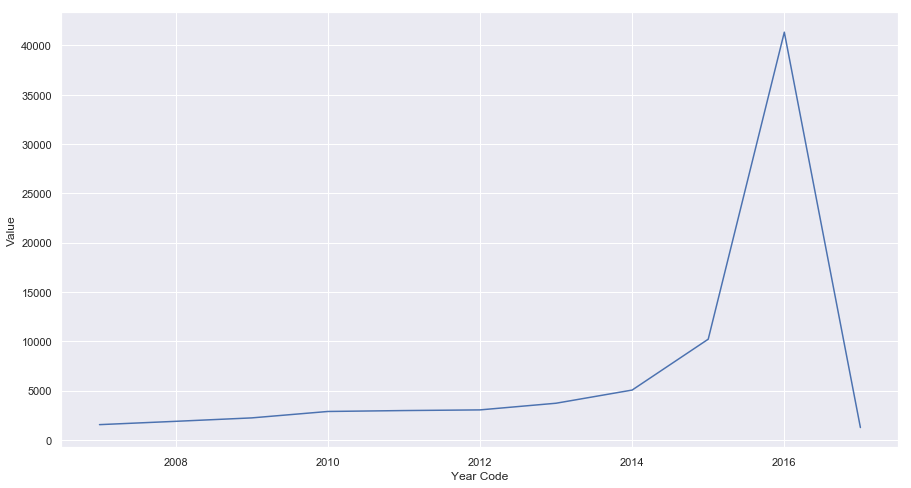

In [273]:
sb.lineplot(data=top10_prices.groupby('Year Code').sum().reset_index(),x='Year Code',y='Value')

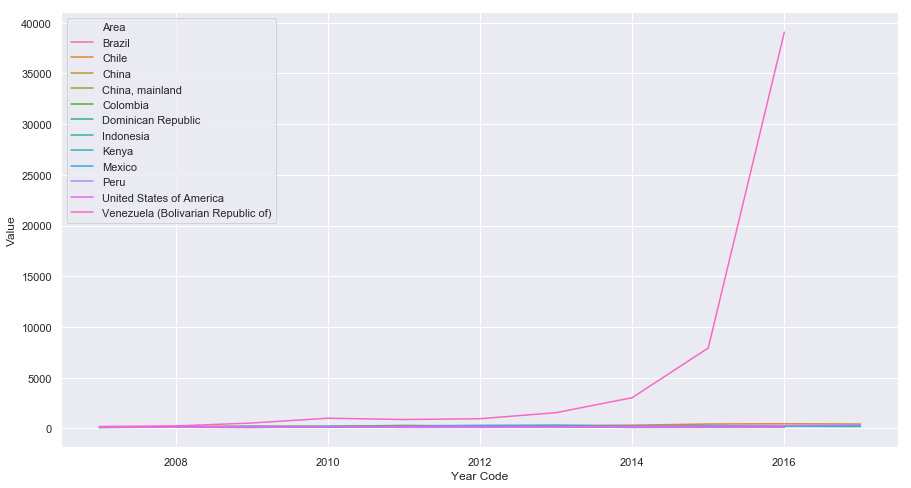

In [264]:
sb.lineplot(data=top10_prices,x='Year Code',y='Value',hue='Area')